In [3]:
# Load loop combinations file

import matplotlib.style
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import cv2

from pathlib import Path

matplotlib.use('inline')


In [4]:
current_folder = Path(".").resolve()
aligned_folder = current_folder / "aligned_images"

fingerprint_img_1 = aligned_folder / "0" / "cropped_0_1.jpg"

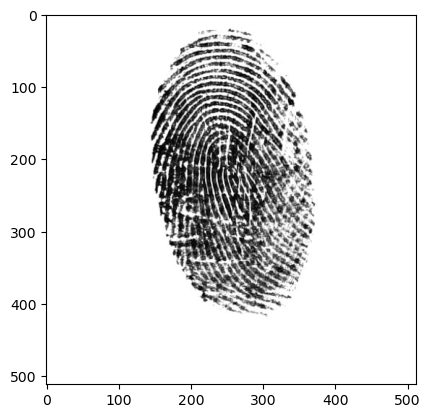

In [5]:
img_1 = cv2.imread(str(fingerprint_img_1), cv2.IMREAD_GRAYSCALE)

plt.imshow(img_1, cmap='gray')

In [6]:
from mindtct.mindtct_processor import get_minutiae

minutiae_path_1 = aligned_folder / "0" / "mindtct_cropped_0_1" / "cropped_0_1.min"
minutiae_path_2 = aligned_folder / "0" / "mindtct_cropped_0_2" / "cropped_0_2.min"

minutiae_path_1nc = aligned_folder / "0" / "mindtct_aligned_0_1" / "aligned_0_1.min"
minutiae_path_2nc = aligned_folder / "0" / "mindtct_aligned_0_2" / "aligned_0_2.min"

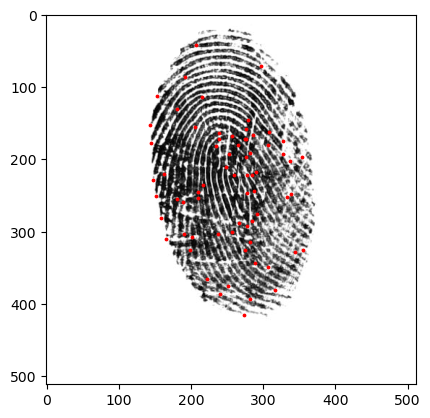

In [7]:
minutiae_df_1 = get_minutiae(minutiae_path_1)
minutiae_df_2 = get_minutiae(minutiae_path_2)

minutiae_df_1nc = get_minutiae(minutiae_path_1nc)
minutiae_df_2nc = get_minutiae(minutiae_path_2nc)

for _, row in minutiae_df_1.iterrows():
    x, y = row["x_coord"], row["y_coord"]
    plt.scatter(x, y, s=3, color="r")
    plt.imshow(img_1, cmap='gray')



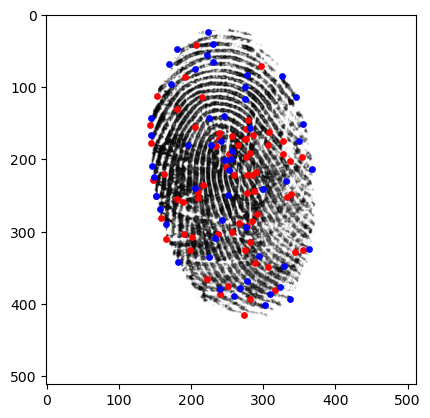

In [8]:
import numpy as np


x1, y1 = [], []
x2, y2 = [], []

for _, row in minutiae_df_1.iterrows():
    x1.append(row['x_coord'])
    y1.append(row['y_coord'])


for _, row in minutiae_df_2.iterrows():
    x2.append(row["x_coord"])
    y2.append(row["y_coord"])

plt.scatter(x1, y1, s=15, color="r")
plt.scatter(x2, y2, s=15, color="b")
plt.imshow(img_1, cmap='gray')

In [9]:
# Create a mask for fingerprint 1

from segmentator import create_segmented_and_variance_images


_, _, x = create_segmented_and_variance_images(img_1, 8, threshold=0.4)
x = cv2.GaussianBlur(x, (15, 15), 10)
cv2.erode(x, (35, 35), x, iterations=1)
y = cv2.bitwise_and(img_1, img_1, mask=x)



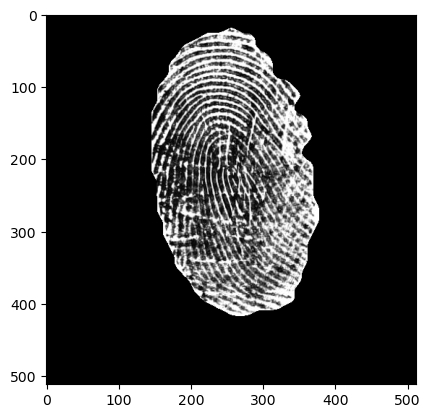

In [10]:
plt.imshow(y, cmap='gray')

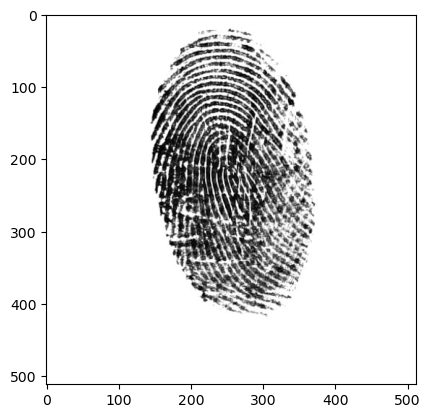

In [11]:
plt.imshow(img_1, cmap='gray')

In [12]:
df1_new = minutiae_df_2.loc[minutiae_df_2.index.isin(minutiae_df_2nc.index)]


In [13]:
df1_new

,x_coord,y_coord,direction,reliability,type,internal_type,feature_id,nx1,ny1,rc1,...,rc2,nx3,ny3,rc3,nx4,ny4,rc4,nx5,ny5,rc5
0,144,143,3,0.168,RIG,DIS,1,169,68,1,...,0,196,180,6,145,166,0,146,209,0
1,145,166,2,0.191,RIG,DIS,1,172,95,1,...,9,196,180,5,149,224,1,146,209,0
2,146,209,2,0.178,RIG,DIS,1,196,180,3,...,7,149,224,0,157,269,1,152,250,0
3,149,224,2,0.163,RIG,DIS,1,196,180,2,...,6,165,290,2,157,269,1,152,250,0
4,152,250,1,0.166,RIG,DIS,1,196,180,1,...,5,182,342,1,165,290,0,157,269,0
5,157,269,1,0.169,RIG,DIS,1,206,240,4,...,9,233,309,8,165,290,0,182,342,2
6,165,290,1,0.175,RIG,DIS,1,206,240,3,...,8,233,309,7,225,335,6,182,342,1
7,169,68,4,0.142,RIG,DIS,1,181,47,0,...,1,231,65,2,206,75,2,172,95,2
8,172,95,4,0.21,BIF,DIS,2,181,47,2,...,0,206,75,0,231,65,1,225,143,8
9,181,47,6,0.122,RIG,APP,0,223,23,1,...,0,222,55,2,231,65,3,206,75,3


In [16]:
minutiae_df_2nc

,x_coord,y_coord,direction,reliability,type,internal_type,feature_id,nx1,ny1,rc1,...,rc2,nx3,ny3,rc3,nx4,ny4,rc4,nx5,ny5,rc5
0,131,189,2,0.142,RIG,DIS,1,151,107,1,...,5,145,242,3,131,245,0,131,269,0
1,131,245,2,0.129,RIG,DIS,1,145,242,1,...,4,133,306,0,132,283,0,131,269,0
2,131,269,2,0.136,RIG,DIS,1,145,242,0,...,3,153,318,4,132,283,0,133,306,0
3,132,283,2,0.134,RIG,DIS,1,145,242,0,...,2,153,318,3,139,334,0,133,306,0
4,133,306,2,0.122,RIG,DIS,1,161,271,1,...,4,153,318,1,164,356,4,139,334,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,371,223,30,0.49,BIF,DIS,2,396,158,3,...,0,395,280,0,391,295,0,376,332,4
69,376,332,28,0.173,RIG,DIS,1,396,158,8,...,5,395,280,4,391,295,2,NaN,NaN,NaN
70,391,295,30,0.142,RIG,DIS,1,396,158,4,...,1,395,280,0,NaN,NaN,NaN,NaN,NaN,NaN
71,394,247,31,0.154,RIG,DIS,1,396,158,2,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


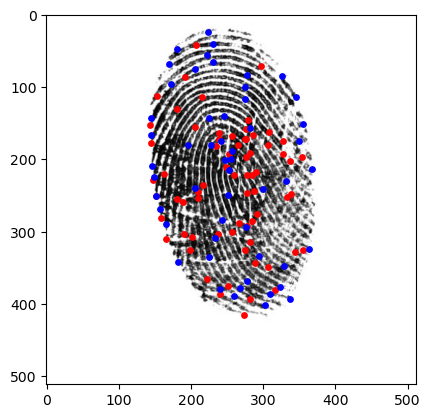

In [21]:
img1_nc = cv2.imread(aligned_folder / "0" / "original_0_1.jpg")

x3, y3 = [], []

for _, row in minutiae_df_1.iterrows():
    x3.append(row['x_coord'])
    y3.append(row['y_coord'])

plt.scatter(x3, y3, s=15, color="r")
#plt.imshow(img1_nc, cmap='gray')

x4, y4 = [], []

for _, row in df1_new.iterrows():
    x4.append(row['x_coord'])
    y4.append(row['y_coord'])

plt.scatter(x4, y4, s=15, color="b")
plt.imshow(img1_nc, cmap='gray')


In [2]:
!snakeviz ./single_optimal_cut.prof

snakeviz web server started on 127.0.0.1:8080; enter Ctrl-C to exit
http://127.0.0.1:8080/snakeviz/%2Fhome%2Fpanz%2FDesktop%2FAndrea_Panzino%2FMorphenprint%2Fsingle_optimal_cut.prof
Loading "original-fs" failed
Error: Cannot find module 'original-fs'
Require stack:
- /home/panz/.vscode-server/cli/servers/Stable-fee1edb8d6d72a0ddff41e5f71a671c23ed924b9/server/out/server-cli.js
    at Module._resolveFilename (node:internal/modules/cjs/loader:1145:15)
    at Module._load (node:internal/modules/cjs/loader:986:27)
    at Module.require (node:internal/modules/cjs/loader:1233:19)
    at require (node:internal/modules/helpers:179:18)
    at i (/home/panz/.vscode-server/cli/servers/Stable-fee1edb8d6d72a0ddff41e5f71a671c23ed924b9/server/out/server-cli.js:3:98)
    at r.load (/home/panz/.vscode-server/cli/servers/Stable-fee1edb8d6d72a0ddff41e5f71a671c23ed924b9/server/out/server-cli.js:2:1637)
    at h.load (/home/panz/.vscode-server/cli/servers/Stable-fee1edb8d6d72a0ddff41e5f71a671c23ed924b9/serv

'single_optimal_cut.prof'